In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as PLT
from tensorflow.keras import models, layers, optimizers
from tensorflow.keras.applications.resnet import ResNet152, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential, Model,Input
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D,ZeroPadding2D, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
import os,glob,random,shutil
from pathlib import Path
from tensorflow.keras.optimizers.legacy import Adam

In [4]:
import tensorflow as tf; print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [22]:
data_path = os.path.abspath(os.path.join('__file__', '../../../../datasets/Caltech256/data/'))
train_test_path = os.path.abspath(os.path.join('__file__', '../../../../datasets/Caltech256/train_test/'))
train_path = os.path.abspath(os.path.join(train_test_path, 'train/'))
test_path = os.path.abspath(os.path.join(train_test_path, 'test/'))

In [9]:
train_count = 30

if os.path.isdir(train_test_path):
    shutil.rmtree(train_test_path)
Path(f'{train_test_path}').mkdir(parents=True, exist_ok=True)

for category in os.listdir(data_path):
    images = glob.glob(f'{data_path}/{category}/*')
    random.shuffle(images)
    
    # train data
    Path(f'{train_path}/{category}/').mkdir(parents=True, exist_ok=True)
    
    for img in images[:train_count]:
        shutil.copyfile(img, f'{train_path}/{category}/{img.split("/")[-1]}')
        
    # test data
    Path(f'{test_path}/{category}/').mkdir(parents=True, exist_ok=True)
    for img in images[train_count:]:
        shutil.copyfile(img, f'{test_path}/{category}/{img.split("/")[-1]}')

In [10]:
image_generator = ImageDataGenerator(rescale=1.0/255.0)
batch_size = 100

generator = image_generator.flow_from_directory(
    train_path,
    class_mode='categorical',
    batch_size=batch_size,
    target_size=(150,150)
)

generator_test = image_generator.flow_from_directory(
    test_path,
    class_mode='categorical',
    batch_size=batch_size,
    target_size=(150,150)
)

Found 7710 images belonging to 257 classes.
Found 22897 images belonging to 257 classes.


# Default laerning rate 0.001

In [79]:
model = Sequential([
 
    Conv2D(4, 2, strides=1, activation='relu'),
    BatchNormalization(axis=-1),
    MaxPool2D(pool_size=2, strides=2),
    
    Conv2D(8, 2, strides=1, activation='relu'),
    BatchNormalization(axis=-1),
    MaxPool2D(pool_size=2, strides=2),
    
    Conv2D(16, 2, strides=1, activation='relu'),
    BatchNormalization(axis=-1),
    MaxPool2D(pool_size=2, strides=2),
    
    Conv2D(32, 2, strides=1, activation='relu'),
    BatchNormalization(axis=-1),
    MaxPool2D(pool_size=2, strides=2),
    
    Conv2D(64, 2, strides=1, activation='relu'),
    BatchNormalization(axis=-1),
    MaxPool2D(pool_size=2, strides=2),
    
    Flatten(),
    Dense(100, activation='relu'),
    Dropout(0.5),
    Dense(257, activation='softmax')
])

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [80]:
history = model.fit(
    generator,
    validation_data=generator_test,
    epochs=20,
)

Epoch 1/20
78/78 [==============================] - 41s 529ms/step - loss: 5.6391 - accuracy: 0.0045 - val_loss: 5.6287 - val_accuracy: 0.0048
Epoch 2/20
78/78 [==============================] - 40s 522ms/step - loss: 5.4645 - accuracy: 0.0156 - val_loss: 5.7516 - val_accuracy: 0.0329
Epoch 3/20
78/78 [==============================] - 41s 525ms/step - loss: 5.3175 - accuracy: 0.0287 - val_loss: 5.5436 - val_accuracy: 0.0336
Epoch 4/20
78/78 [==============================] - 41s 527ms/step - loss: 5.1623 - accuracy: 0.0367 - val_loss: 5.3185 - val_accuracy: 0.0405
Epoch 5/20
78/78 [==============================] - 41s 534ms/step - loss: 5.0007 - accuracy: 0.0511 - val_loss: 5.0737 - val_accuracy: 0.0583
Epoch 6/20
78/78 [==============================] - 41s 529ms/step - loss: 4.8447 - accuracy: 0.0629 - val_loss: 4.8929 - val_accuracy: 0.0919
Epoch 7/20
78/78 [==============================] - 42s 538ms/step - loss: 4.6857 - accuracy: 0.0822 - val_loss: 4.7996 - val_accuracy: 0.1062

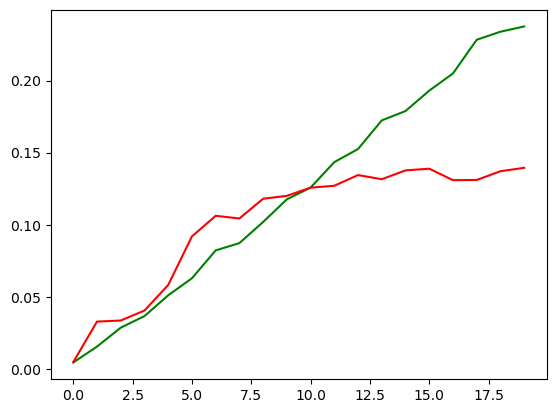

In [81]:
PLT.plot(history.history['accuracy'],color='green')
PLT.plot(history.history['val_accuracy'],color='red')

# Diffrent Learning rate

In [82]:
model.compile(optimizer=Adam(learning_rate=0.03), loss='categorical_crossentropy', metrics=['accuracy'])

In [83]:
history = model.fit(
    generator,
    validation_data=generator_test,
    epochs=20,
)

Epoch 1/20
78/78 [==============================] - 41s 532ms/step - loss: 5.7638 - accuracy: 0.0074 - val_loss: 5.5558 - val_accuracy: 0.0025
Epoch 2/20
78/78 [==============================] - 41s 529ms/step - loss: 5.5668 - accuracy: 0.0031 - val_loss: 5.5541 - val_accuracy: 0.0031
Epoch 3/20
78/78 [==============================] - 41s 525ms/step - loss: 5.5673 - accuracy: 0.0038 - val_loss: 5.5522 - val_accuracy: 0.0044
Epoch 4/20
78/78 [==============================] - 41s 527ms/step - loss: 5.5666 - accuracy: 0.0023 - val_loss: 5.5517 - val_accuracy: 0.0034
Epoch 5/20
78/78 [==============================] - 41s 526ms/step - loss: 5.5660 - accuracy: 0.0025 - val_loss: 5.5542 - val_accuracy: 0.0035
Epoch 6/20
78/78 [==============================] - 41s 525ms/step - loss: 5.5903 - accuracy: 0.0034 - val_loss: 5.5582 - val_accuracy: 0.0031
Epoch 7/20
78/78 [==============================] - 41s 529ms/step - loss: 5.5675 - accuracy: 0.0027 - val_loss: 5.5542 - val_accuracy: 0.0022

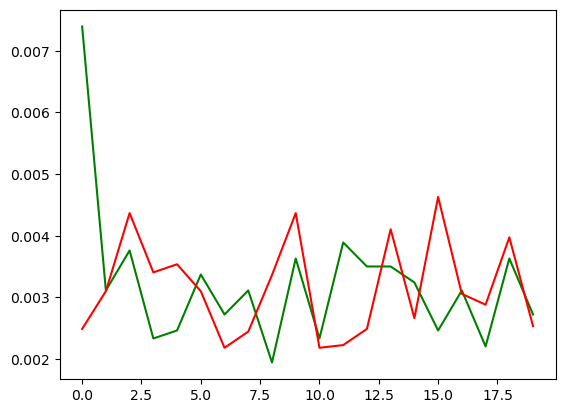

In [84]:
PLT.plot(history.history['accuracy'],color='green')
PLT.plot(history.history['val_accuracy'],color='red')

In [85]:
model.compile(optimizer=Adam(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])

In [86]:
history = model.fit(
    generator,
    validation_data=generator_test,
    epochs=20,
)

Epoch 1/20
78/78 [==============================] - 41s 528ms/step - loss: 5.5588 - accuracy: 0.0029 - val_loss: 5.5521 - val_accuracy: 0.0032
Epoch 2/20
78/78 [==============================] - 41s 526ms/step - loss: 5.5559 - accuracy: 0.0026 - val_loss: 5.5524 - val_accuracy: 0.0036
Epoch 3/20
78/78 [==============================] - 40s 522ms/step - loss: 5.5552 - accuracy: 0.0030 - val_loss: 5.5522 - val_accuracy: 0.0036
Epoch 4/20
78/78 [==============================] - 41s 528ms/step - loss: 5.5553 - accuracy: 0.0025 - val_loss: 5.5494 - val_accuracy: 0.0036
Epoch 5/20
78/78 [==============================] - 41s 524ms/step - loss: 5.5553 - accuracy: 0.0036 - val_loss: 5.5524 - val_accuracy: 0.0027
Epoch 6/20
78/78 [==============================] - 41s 527ms/step - loss: 5.5554 - accuracy: 0.0036 - val_loss: 5.5512 - val_accuracy: 0.0023
Epoch 7/20
78/78 [==============================] - 41s 526ms/step - loss: 5.5552 - accuracy: 0.0026 - val_loss: 5.5518 - val_accuracy: 0.0024

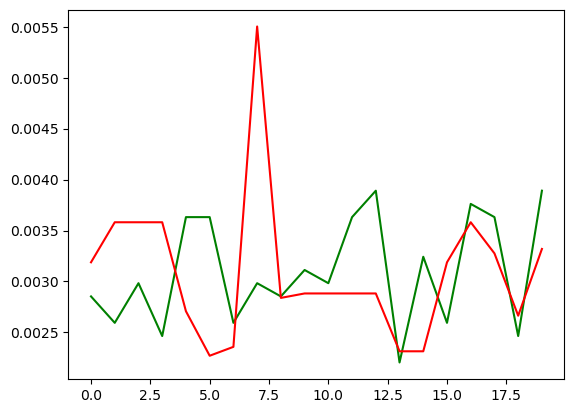

In [87]:
PLT.plot(history.history['accuracy'],color='green')
PLT.plot(history.history['val_accuracy'],color='red')

# Another Model Architecture

In [11]:
model = Sequential([
 
    Conv2D(4, 2, strides=1, activation='relu'),
        BatchNormalization(axis=-1),

    MaxPool2D(pool_size=2, strides=2),
    
    Conv2D(8, 2, strides=1, activation='relu'),
        BatchNormalization(axis=-1),

    MaxPool2D(pool_size=2, strides=2),
    
    Conv2D(16, 2, strides=1, activation='relu'),
        BatchNormalization(axis=-1),

    MaxPool2D(pool_size=2, strides=2),
    
    Conv2D(32, 2, strides=1, activation='relu'),
        BatchNormalization(axis=-1),

    MaxPool2D(pool_size=2, strides=2),
    
    Conv2D(64, 2, strides=1, activation='relu'),
        BatchNormalization(axis=-1),

    MaxPool2D(pool_size=2, strides=2),
    
    Conv2D(128, 2, strides=1, activation='relu'),
        BatchNormalization(axis=-1),

    MaxPool2D(pool_size=2, strides=2),
    
    Flatten(),
    Dense(100, activation='relu'),
    Dropout(0.8),
    Dense(257, activation='softmax')
])

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
history = model.fit(
    generator,
    validation_data=generator_test,
    epochs=20,
)

2023-02-24 22:34:05.985445: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8100
2023-02-24 22:34:06.413486: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-02-24 22:34:06.414190: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-02-24 22:34:06.414219: W tensorflow/compiler/xla/stream_executor/gpu/asm_compiler.cc:85] Couldn't get ptxas version string: INTERNAL: Couldn't invoke ptxas --version
2023-02-24 22:34:06.414689: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-02-24 22:34:06.414716: W tensorflow/compiler/xla/stream_executor/gpu/redzone_allocator.cc:318] INTERNAL: Failed to launch ptxas
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


Epoch 1/20


2023-02-24 22:34:06.851932: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:630] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


78/78 [==============================] - 42s 530ms/step - loss: 5.7993 - accuracy: 0.0036 - val_loss: 5.5632 - val_accuracy: 0.0027
Epoch 2/20
78/78 [==============================] - 41s 534ms/step - loss: 5.5576 - accuracy: 0.0054 - val_loss: 5.5706 - val_accuracy: 0.0037
Epoch 3/20
78/78 [==============================] - 41s 524ms/step - loss: 5.5396 - accuracy: 0.0078 - val_loss: 5.5842 - val_accuracy: 0.0041
Epoch 4/20
78/78 [==============================] - 41s 531ms/step - loss: 5.5172 - accuracy: 0.0075 - val_loss: 5.5515 - val_accuracy: 0.0054
Epoch 5/20
78/78 [==============================] - 41s 526ms/step - loss: 5.5031 - accuracy: 0.0102 - val_loss: 5.4915 - val_accuracy: 0.0100
Epoch 6/20
78/78 [==============================] - 41s 528ms/step - loss: 5.4715 - accuracy: 0.0097 - val_loss: 5.4362 - val_accuracy: 0.0148
Epoch 7/20
78/78 [==============================] - 41s 527ms/step - loss: 5.4407 - accuracy: 0.0131 - val_loss: 5.3892 - val_accuracy: 0.0171
Epoch 8/20

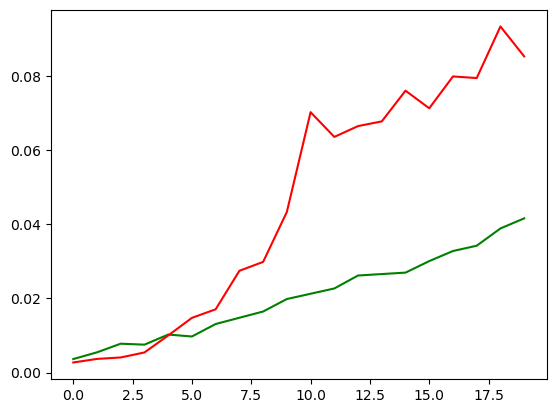

In [13]:
PLT.plot(history.history['accuracy'],color='green')
PLT.plot(history.history['val_accuracy'],color='red')